In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings ('ignore')

In [2]:
df = pd.read_csv("consumer_complaints.csv")
print(df.columns)

Index(['date_received', 'product', 'sub_product', 'issue', 'sub_issue',
       'consumer_complaint_narrative', 'company_public_response', 'company',
       'state', 'zipcode', 'tags', 'consumer_consent_provided',
       'submitted_via', 'date_sent_to_company', 'company_response_to_consumer',
       'timely_response', 'consumer_disputed?', 'complaint_id'],
      dtype='object')


In [3]:
print(df['date_received'].head(3))

0    08/30/2013
1    08/30/2013
2    08/30/2013
Name: date_received, dtype: object


In [3]:
print(df['consumer_disputed?'].value_counts())

No     443823
Yes    112134
Name: consumer_disputed?, dtype: int64


In [3]:
print(df['issue'].value_counts())

Loan modification,collection,foreclosure    97191
Incorrect information on credit report      66718
Loan servicing, payments, escrow account    60375
Cont'd attempts collect debt not owed       42285
Account opening, closing, or management     26661
                                            ...  
Lost or stolen money order                     25
Incorrect exchange rate                        16
Lender sold the property                        5
Lender damaged or destroyed vehicle             5
Lender damaged or destroyed property            1
Name: issue, Length: 95, dtype: int64


In [4]:
df['product'] = df['product'].str.lower()


<p> If columns have more than half of the rows as null then the entire column can be dropped. The rows which are having one or more columns values as null can also be dropped. </p>
<h4> consumer_complaint_narrative Column </h4>

In [5]:
print("Percentage of Rows with Null Values",(df['consumer_complaint_narrative'].isnull().sum()) * 100/(len(df)))

Percentage of Rows with Null Values 87.9836030484372


<h4>company_public_response Column </h4>

In [6]:
print("Percentage of Rows with Null Values",(df['company_public_response'].isnull().sum()) * 100/(len(df)))

Percentage of Rows with Null Values 84.688743913648


<h4>Tags</h4>

In [7]:
print("Percentage of Rows with Null Values",(df['tags'].isnull().sum()) * 100/(len(df)))

Percentage of Rows with Null Values 85.97751264935957


<h4>consumer_consent_provided</h4>

In [8]:
print("Percentage of Rows with Null Values",(df['consumer_consent_provided'].isnull().sum()) * 100/(len(df)))

Percentage of Rows with Null Values 77.79360634005867


In [9]:
df = df.drop(['consumer_complaint_narrative', 'tags','consumer_consent_provided','company_public_response'], axis = 1)

In [10]:
df['sub_product'] = df['sub_product'].fillna('notknown')

In [11]:
df['sub_issue'] = df['sub_issue'].fillna('unknown')

In [12]:
df['state'] = df['state'].fillna('N')

In [13]:
df['zipcode'] = df['zipcode'].fillna('00000')

(array([112134.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0., 443823.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

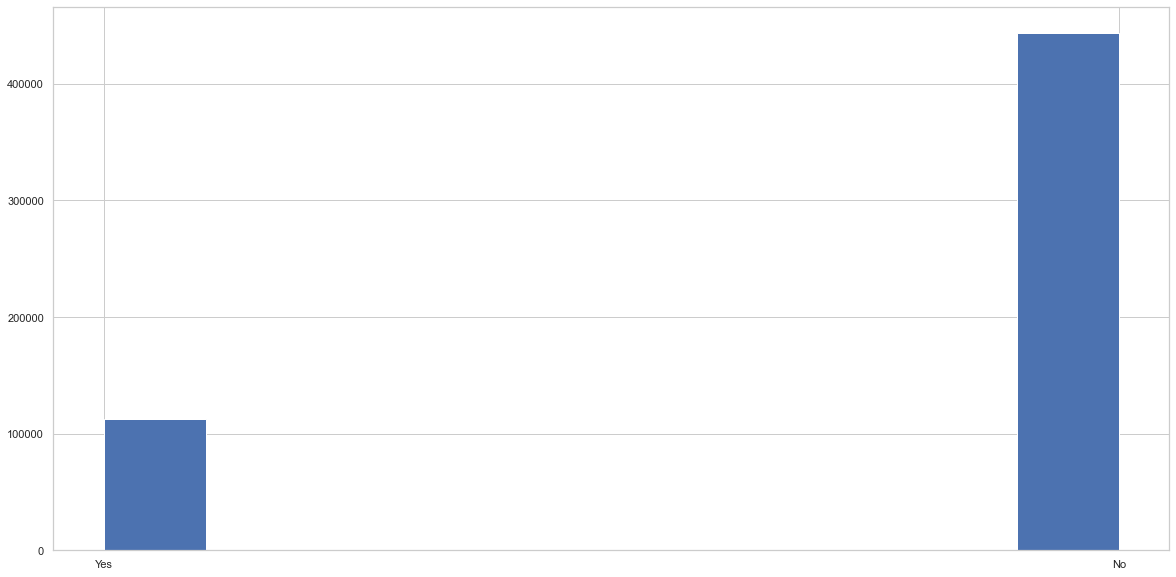

In [138]:
plt.hist(df['consumer_disputed?'])

<h3> This is imbalanced dataset as no. of negative points are more as compared to positive points (nearly 4 times)</h3>

In [10]:
!pip install wordcloud

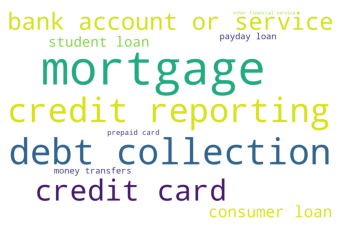

In [11]:

from wordcloud import WordCloud
data = df['product'].value_counts().to_dict()
wc = WordCloud(width = 1200, height = 800, background_color ='white',min_font_size = 10).generate_from_frequencies(data)

plt.imshow(wc)
plt.axis('off')
plt.show()

<p text_size='25px'>  From above we could conclude that the most of the complaints were regarding the <b>Mortgage product followed by Credit reporting,Debt Collection ,Bank account or service</b>.It means the financial institution is not transparent with the policies regarding mortgage or the customer is not paying attention towards the policies.</p>

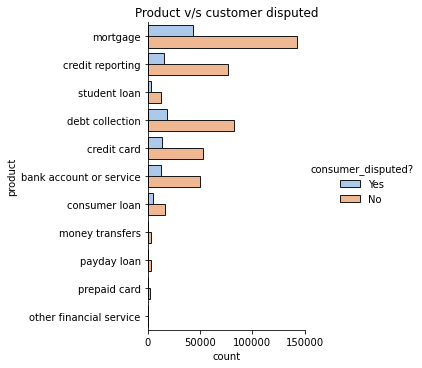

In [63]:
sns.catplot(y="product", hue="consumer_disputed?", kind="count",
            palette="pastel", edgecolor=".10",
            data=df)
plt.title("Product v/s customer disputed")
plt.show()

<p> There are large no. of customers which are not satisfied by the service provided by financial institution for the Mortgage product followed by Debt collection and credit reporting compared to any other product. As it may be because these product have higher no. of complaints. </p> 

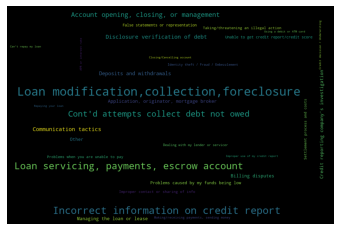

In [13]:
data = df['issue'].value_counts().to_dict()
wc = WordCloud(width = 1200, height = 800, background_color ='black',min_font_size = 10).generate_from_frequencies(data)

plt.imshow(wc)
plt.axis('off')
plt.show()

<p> The major issues which are highlighted in the complaints are Loan modification,collection,foreclosure , incorrect information on credit report ,Loan servicing, payments, escrow account. </p>

Text(0, 0.5, 'State')

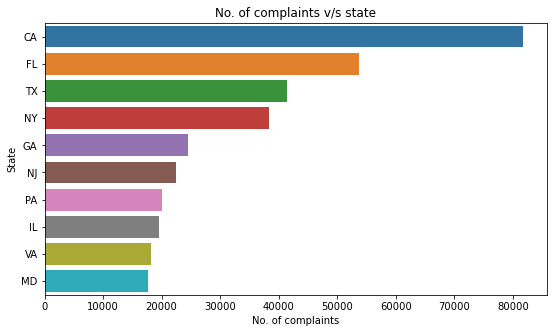

In [14]:
state = df['state'].value_counts().head(10).index
plt.figure(figsize=(9, 5))
sns.countplot(data=df, y='state', order=state)
plt.title('No. of complaints v/s state')
plt.xlabel('No. of complaints')
plt.ylabel('State')

<p> Sate which got the maximum complaint are California followed by Florida,Texas and Newyork. </p>

<h4> Zipcode : The mailing zipcode provided by the consumer.</h4>

Text(0, 0.5, 'Zipcode')

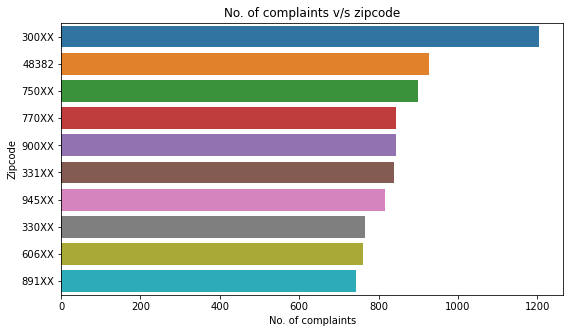

In [17]:
zipcode = df['zipcode'].value_counts().head(10).index
plt.figure(figsize=(9, 5))
sns.countplot(data=df, y='zipcode', order=zipcode)
plt.title('No. of complaints v/s zipcode')
plt.xlabel('No. of complaints')
plt.ylabel('Zipcode')

In [20]:
df_new = df[df['zipcode'] == '300XX']
print(df_new['state'].value_counts())

GA    1202
VA       2
AL       1
Name: state, dtype: int64


In [21]:
df_new = df[df['zipcode'] == '48382']
print(df_new['state'].value_counts())

MI    925
WI      1
MN      1
Name: state, dtype: int64


<p> Bascially the higher no. of complaints in the dataset is from Zipcode <b> 300XX</b> and its corresponding state is Georgia followed by zipcode <b> 48382 </b> and whose corresponding state is Michigan.</p>

Text(0, 0.5, 'Company')

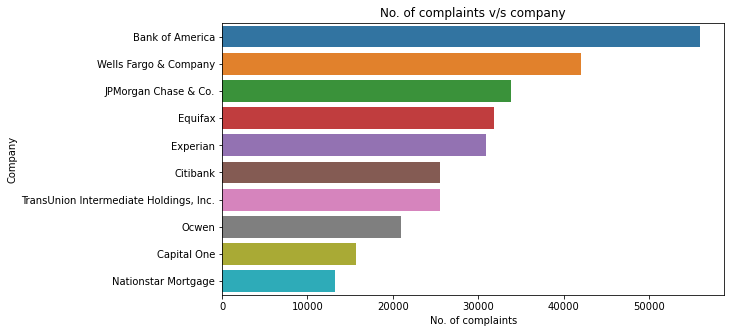

In [22]:
company = df['company'].value_counts().head(10).index
plt.figure(figsize=(9, 5))
sns.countplot(data=df, y='company', order=company)
plt.title('No. of complaints v/s company')
plt.xlabel('No. of complaints')
plt.ylabel('Company')

<p> Bank of America got highest no. of complaints followed by Wells Fargo ,JPMorgan Chase. The reason can be that these bank provides large no. of product services.</p>

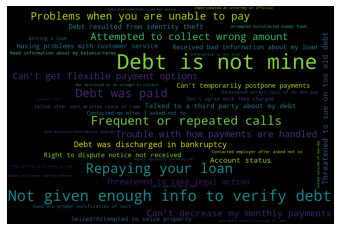

In [31]:
df_new = df[(df['company'] == 'Bank of America') | (df['company'] == 'Wells Fargo & Company') | (df['company'] == 'JPMorgan Chase & Co.')]
data = df_new['sub_issue'].value_counts().to_dict()
wc = WordCloud(width = 1200, height = 800, background_color ='black',min_font_size = 10).generate_from_frequencies(data)

plt.imshow(wc)
plt.axis('off')
plt.show()

<p> This wordcloud plot exhibit the major sub-issues appeared in the complaints of top 3 companies having  higher no. of complaints .<p>
<ul> Major sub-issues: 
    <li> Debt is not mine </li>
    <li> Not given enough info to verify debt. </li>
    <li> Repaying your loan </li>
    </ul>

Index(['08/27/2015', '06/26/2014', '08/26/2015', '07/08/2015', '08/12/2015',
       '02/23/2016', '01/26/2016', '07/09/2015', '10/14/2015', '09/23/2015',
       '02/17/2016', '09/10/2015', '03/01/2016', '08/05/2015', '03/19/2015',
       '08/06/2015', '08/25/2015', '03/15/2016', '01/14/2016', '07/21/2015'],
      dtype='object')


Text(0, 0.5, 'Date received')

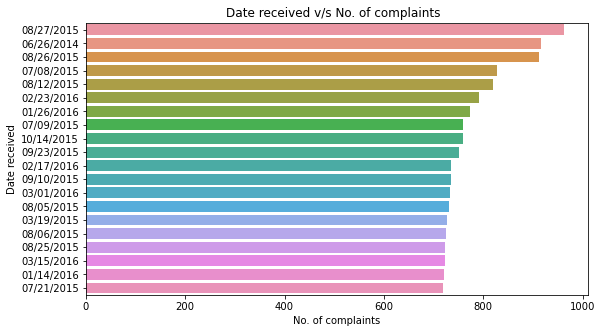

In [16]:
dater = df['date_received'].value_counts().head(20).index
print(dater)
plt.figure(figsize=(9, 5))
sns.countplot(data=df, y='date_received', order=dater)
plt.title('Date received v/s No. of complaints  ')
plt.xlabel('No. of complaints')
plt.ylabel('Date received')

<p> Higher no. of complains were received in 2015 year </p>

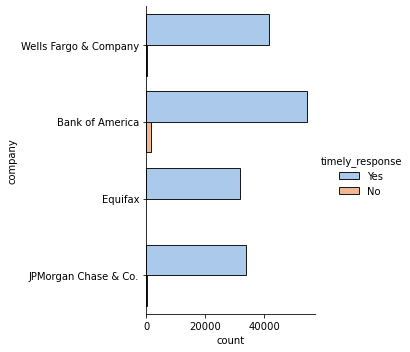

In [61]:
df_new = df[(df['company'] == 'Bank of America') | (df['company'] == 'Wells Fargo & Company') | (df['company'] == 'JPMorgan Chase & Co.') | (df['company'] == 'Equifax')]
sns.catplot(y="company", hue="timely_response", kind="count",
            palette="pastel", edgecolor=".10",
            data=df_new)

<p> From the top companies which got higher no. of complaints ,Bank of America lacks in timely_response and timely_response is very important for the customer satisfaction.</p>


Text(0, 0.5, 'Submitted_via')

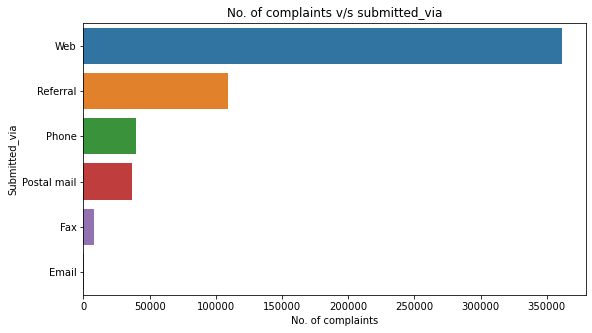

In [64]:
statevia = df['submitted_via'].value_counts().head(10).index
plt.figure(figsize=(9, 5))
sns.countplot(data=df, y='submitted_via', order=statevia)
plt.title('No. of complaints v/s submitted_via')
plt.xlabel('No. of complaints')
plt.ylabel('Submitted_via')

<p>Companies got higher no. of complaints from web.It means that companies need to implement more manpower on the web portal so that customer could get the timely reply.</p>

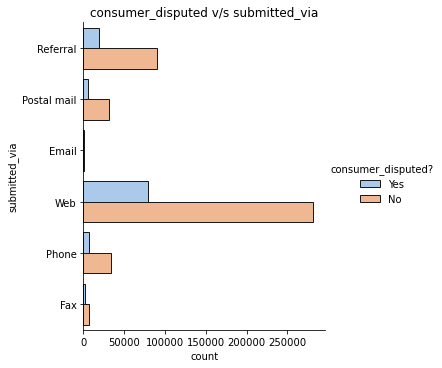

In [66]:
sns.catplot(y="submitted_via", hue="consumer_disputed?", kind="count",
            palette="pastel", edgecolor=".10",
            data=df)
plt.title("consumer_disputed v/s submitted_via")
plt.show()

<p> Companies mainly fails to satisfy the customer through their web query portal. </p>

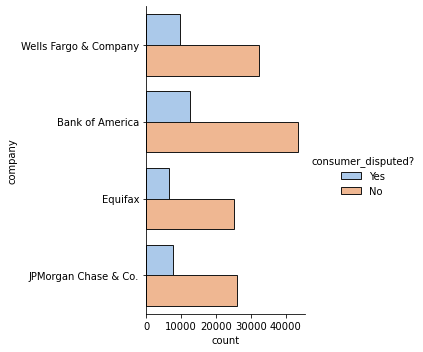

In [72]:
df_new = df[(df['company'] == 'Bank of America') | (df['company'] == 'Wells Fargo & Company') | (df['company'] == 'JPMorgan Chase & Co.') | (df['company'] == 'Equifax')]
sns.catplot(y="company", hue="consumer_disputed?", kind="count",
            palette="pastel", edgecolor=".10",
            data=df_new)

<p> Bank of America have high customer dissatisfaction rate </p>

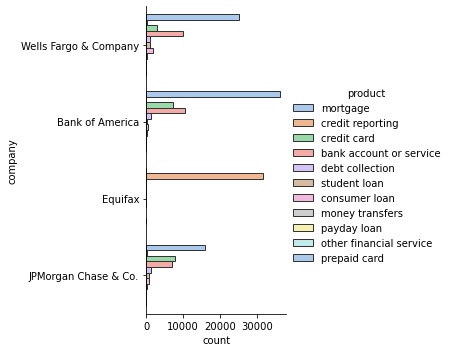

In [75]:
df_new = df[(df['company'] == 'Bank of America') | (df['company'] == 'Wells Fargo & Company') | (df['company'] == 'JPMorgan Chase & Co.') | (df['company'] == 'Equifax')]
sns.catplot(y="company", hue="product", kind="count",
            palette="pastel", edgecolor=".20",
            data=df_new)

<p> Among the top companies who got the highest complaints ,Equifax is the company which provide only credit card product and other companies provides 5-6 products . It means that Equifax have worst customer satisfaction rate as acc. to my view companies could tend to get more complains when they provide larger no. of the products but Equifax is not one of them.</p>

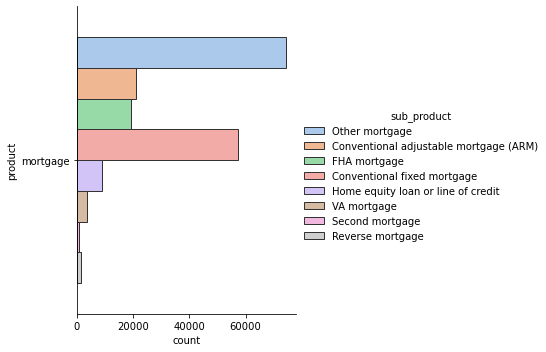

In [80]:
df_new = df[(df['product'] == 'mortgage') ]
sns.catplot(y="product", hue="sub_product", kind="count",
            palette="pastel", edgecolor=".20",
            data=df_new)

 <p> Mortgage is the main product for which we got highest no. of complaints so by using this plot we are looking more into the mortgage to get the root cause.</p>
    <ul> Sub products which got the highest no. of complaints for the Mortgage product are :
        <li> Other Mortgage(It doesnot give us major issue) </li>
        <li> Conventional fixed mortgage </li>
        <li> Conventional adjustable mortgage </li>
        </ul>

In [14]:
df['date_received'] = pd.to_datetime(df['date_received'])D

df['date_received_year'] = df['date_received'].dt.year
df['date_received_month'] = df['date_received'].dt.month
df['ddate_received_day'] = df['date_received'].dt.day

In [ ]:
df['date_sent_to_company'] = pd.to_datetime(df['date_sent_to_company'])
df['date_sent_to_company_year'] = df['date_sent_to_company'].dt.year
df['date_sent_to_company_month'] = df['date_sent_to_company'].dt.month
df['date_sent_to_company_day'] = df['date_sent_to_company'].dt.day

In [ ]:
df = df.drop(['date_received', 'date_sent_to_company'], axis = 1)

In [16]:
print(df[])

Index(['product', 'sub_product', 'issue', 'sub_issue', 'company', 'state',
       'zipcode', 'submitted_via', 'company_response_to_consumer',
       'timely_response', 'consumer_disputed?', 'complaint_id',
       'date_sent_to_company_year', 'date_sent_to_company_month',
       'date_sent_to_company_day', 'date_received_year', 'date_received_month',
       'ddate_received_day'],
      dtype='object')


[]

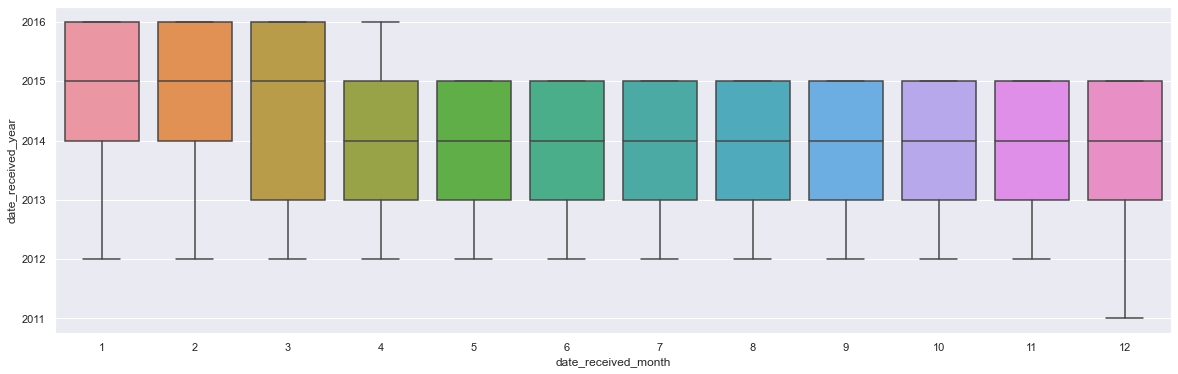

In [95]:
sns.boxplot(x='date_received_month',y='date_received_year',data=df)
plt.plot()

<p>In 2011,we got minimum complaints in december month and for all other month we got min. complaints in 2012.</p>

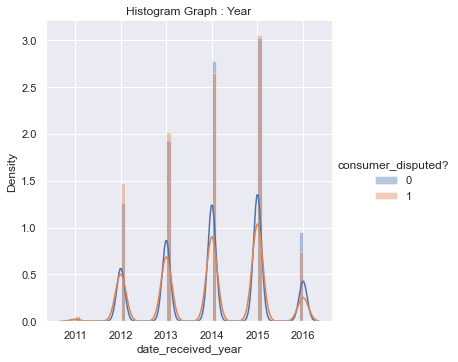

In [104]:

sns.FacetGrid(df, hue="consumer_disputed?", size=5) \
   .map(sns.distplot, "date_received_year") \
   .add_legend();
plt.title("Histogram Graph : Year")
plt.show();

<p> In 2014 and 2016 ,the customer satisfaction rate is high as compared to other years</p>

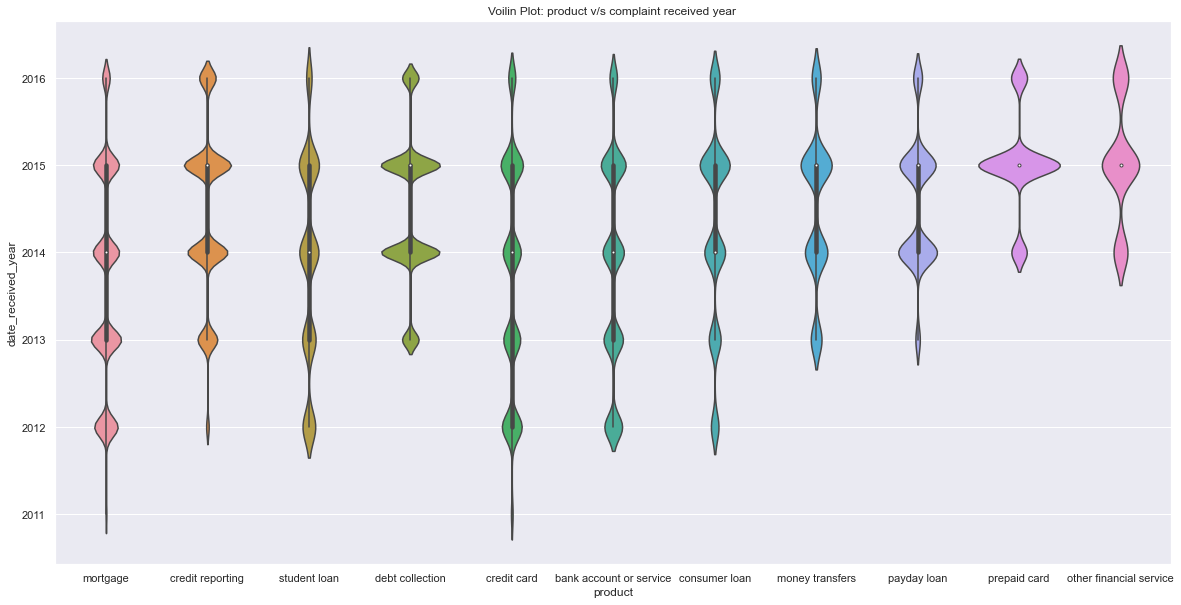

In [106]:
sns.set(rc={'figure.figsize':(20,10)})
sns.violinplot(y="date_received_year", x="product", data=df, size=8)
plt.title("Voilin Plot: product v/s complaint received year ")
plt.show()

<ul> Violin plot : Product v/s year of complaint 
    <li> <b> Mortgage :</b>
        <ul> 
        <li> <b>2011:</b> Complaints from Mortgage product were not received .</li>
            <li> In year  2012,2013,2014,2015 companies got moderate no. of complaints.</li>
            <li> In year 2016 the no. of complaints were less than that of other years except 2011. </li>
            </ul>
      <li><b> Credit Reporting : </b>
      <ul>
      <li> In 2015 ,companies got higher no. of complaints than any other year followed by 2014,2013,2016,2012.</li>
       </ul>
       <li><b>Student Loan </b>
       <ul><li> In every year company got the complaints from student loan product but seems slightly decrease in no. of complaints in 2016 and with zero complaints in 2011.</li>
            </ul>
       <li><b> Debt collection : </b>
        <ul>
            <li> Max no. of complains in 2014 and 2015 </li> </ul>
        <li><b> Credit Card : </b>
        <ul>
            <li> In every year company got the complaints from Credit Card product but seems slightly decrease in no. of  complaints in 2016 and with zero complaints in 2011. </li> </ul>
        <li><b> Bank Account or Services : </b>
        <ul>
            <li> n every year company got the complaints from  Bank Account or Services product but seems slightly decrease in no. of  complaints in 2016 and with zero complaints in 2011. </li> </ul>
        <li><b>Customer loan : </b>
        <ul>
            <li> Max no. of complains in 2015 followed by 2014 </li> </ul>
        <li><b>Money Transfers : </b>
        <ul>
            <li> Max no. of complains in 2015 followed by 2014 </li> </ul>
        <li><b>Pay day loan : </b>
        <ul>
            <li> Max no. of complains in 2015 followed by 2014 </li> </ul>
        <li><b>Prepaid Card : </b>
        <ul>
            <li> Max no. of complains in 2015 and it is highest among all other product in that year. </li> </ul>
         </ul>
        
          
          
   
        

<p> From the previous observations we found that in 2015 companies got the max. no. of complaints .Regarding that the max. no. of complaint were from the products credit reporting,debt collection and prepaid card . 

In [115]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
vectorizer = TfidfVectorizer(min_df=10)
vectorizer.fit(df['issue'].values)
TfidfXtrain_tfidf_issue= vectorizer.transform(df['issue'])
feature = vectorizer.get_feature_names()
# finding the idf values of feature names 
idf = vectorizer.idf_
vedic = dict(zip(vectorizer.get_feature_names(), idf))

from nltk.corpus import stopwords
import nltk
fename = []
idf =[]
stop_words = stopwords.words('english')
# Removing stopwords from the feature names and appending fearturename and idf value in the lists.
for i in vedic.items():
    a=i[0]
    if a not in stop_words:
        fename.append(i[0])
        idf.append(i[1])
   
        
#converting each vectorized feature into its root word
from nltk.stem import PorterStemmer
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()  
ps = PorterStemmer()
  


stemedword =[]  
for w in fename:
     stemedword.append(lemmatizer.lemmatize(w))
#converting the stemwords and idf values in the dataframe.
df_new = pd.DataFrame({'stemmedfeature':stemedword,'idfvalues':idf})
df_new = df_new.sort_values(by='idfvalues' )

#remove the duplicates (same root word)
df_new = df_new.drop_duplicates(subset='stemmedfeature',keep='first')
df_ten = df_new.head(20)


[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\vaish\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


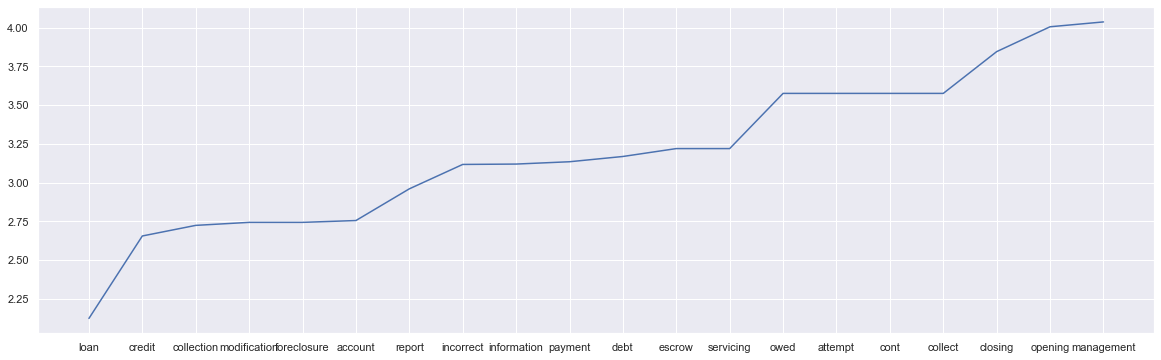

In [116]:
sns.set(rc={'figure.figsize':(20,6)})
plt.plot(df_ten['stemmedfeature'],df_ten['idfvalues'])

<p> Idf value tells how important a particular word in a given dataset.It gives the high score to the word which is less frequent.
so the words with lower Idf is management,opening,closin,collect,attempt</p>

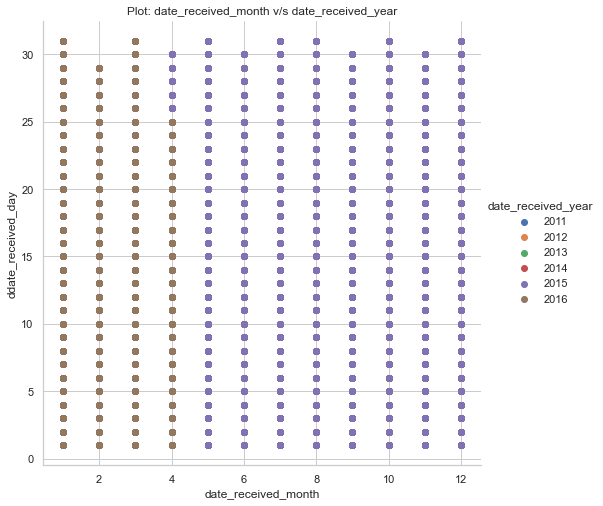

In [122]:
sns.set(rc={'figure.figsize':(20,10)})
sns.set_style("whitegrid")
sns.FacetGrid(df,hue="date_received_year",size=7).map(plt.scatter,"date_received_month","ddate_received_day").add_legend()
plt.title("Plot: date_received_month v/s date_received_year")
plt.show()

<p> In 2015 and 2014 we got maximum complaints.</p>

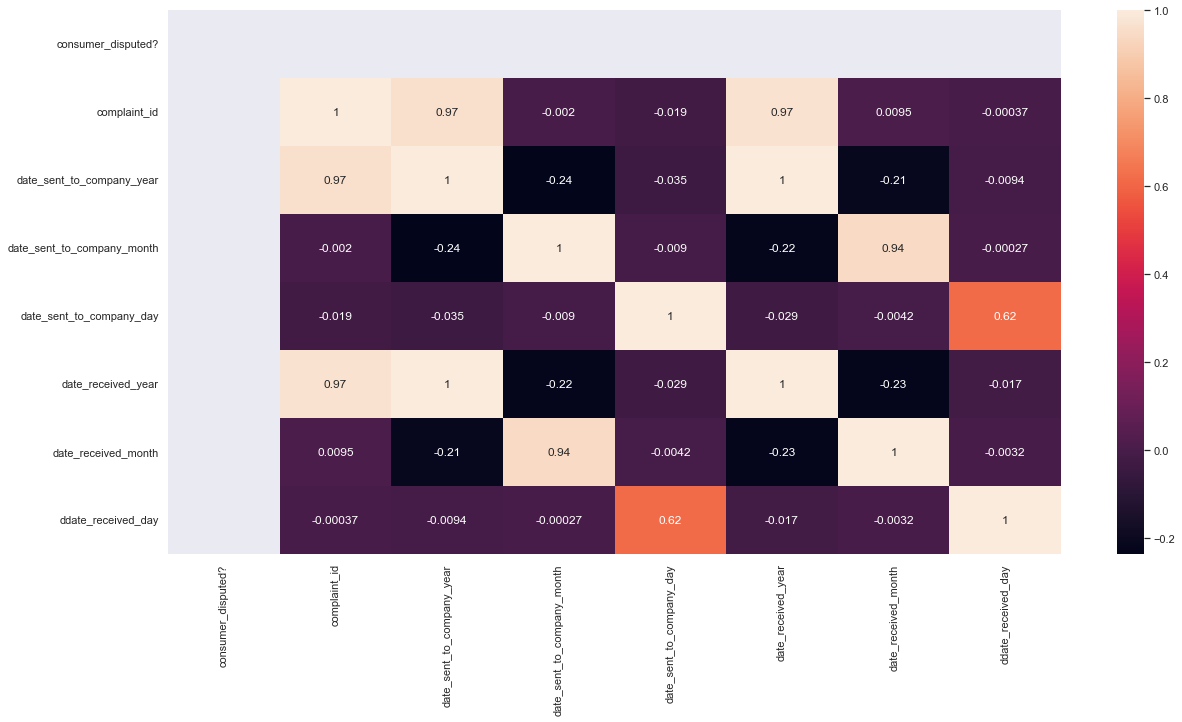

In [24]:
sns.set(rc={'figure.figsize':(20,10)})
df['consumer_disputed?']= np.where(df['consumer_disputed?'] == "Yes", 1, 0)
ax = sns.heatmap(df.corr(), annot=True)

<p> df.corr() return the matrix of the correlation b/w numeric value features. Data_received_month is highly correlated with customer_disputed feature which is our target variable.</p>

In [33]:
X = pd.DataFrame(df, columns=['complaint_id', 'date_sent_to_company_year','date_sent_to_company_month','date_sent_to_company_day','date_received_year','date_received_month','ddate_received_day'])
df['consumer_disputed?']= np.where(df['consumer_disputed?'] == "Yes", 1, 0)
labels=df['consumer_disputed?']

from sklearn.preprocessing import StandardScaler
 
standardized_data = StandardScaler().fit_transform(X)
print(standardized_data.shape)
data_1000 = standardized_data[0:10000, :]
labels_1000 = labels[0:10000]


Index(['complaint_id', 'date_sent_to_company_year',
       'date_sent_to_company_month', 'date_sent_to_company_day',
       'date_received_year', 'date_received_month', 'ddate_received_day'],
      dtype='object')
(555957, 7)


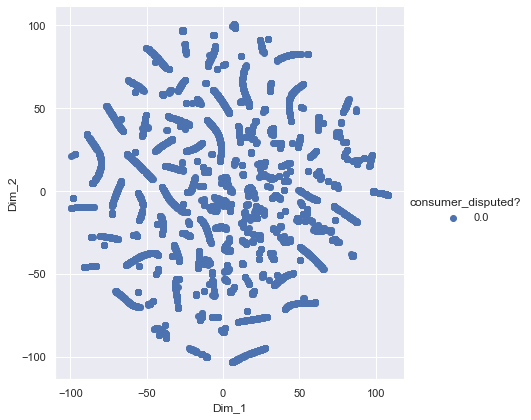

In [34]:
from sklearn.manifold import TSNE
model = TSNE(n_components = 2, random_state = 0)
tsne_data = model.fit_transform(data_1000)
tsne_data = np.vstack((tsne_data.T, labels_1000)).T
tsne_df = pd.DataFrame(data = tsne_data,
     columns =("Dim_1", "Dim_2", "consumer_disputed?"))
 
# Ploting the result of tsne
sns.FacetGrid(tsne_df, hue ="consumer_disputed?", size = 6).map(
       plt.scatter, 'Dim_1', 'Dim_2').add_legend()
 
plt.show()

<h2> Summary </h2>

<p> Customer satisfaction is the main target of this project. Our main aim is to find out the root cause where the company is lacking to satisfy the customer.</p>
<p> We have large no. of customers which are satisfied which we find out from the customer_disputed? feature present in the dataset if the customer is satisfied by the companies customer service he/she will not dispute again.</p>
<ul> <b> MAJOR FINDINGS </ul>
<li> Mortgage,credit reporting,Debt collections are the major products for which complained is raised.</li>
<li> Companies which got the higher no. of complaints are Bank of America,Wells Fargo & Company and JPMorgan Chase & Co.</ul>
<li> Majorly we got the complaints from california,Floria and Texas.</li>
<li> Equifax company is the bad performer. </li>
<li> In 2015 we got the highest no. of complaints, </li>
</ul>


In [36]:
from sklearn.model_selection import train_test_split


X_train, X_test = train_test_split(df, test_size=0.2, stratify=df['consumer_disputed?'], random_state=888)

In [37]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
vectorizer = TfidfVectorizer(min_df=10)
vectorizer.fit(X_train['issue'].values)
TfidfXtrain_tfidf_issue= vectorizer.transform(X_train['issue'])
TfidfXtest_tfidf_issue= vectorizer.transform(X_test['issue'])

vectorizer.fit(X_train['product'].values)
TfidfXtrain_tfidf_product= vectorizer.transform(X_train['product'])
TfidfXtest_tfidf_product= vectorizer.transform(X_test['product'])
 
vectorizer.fit(X_train['sub_issue'].values)
TfidfXtrain_tfidf_sub_issue= vectorizer.transform(X_train['sub_issue'])
TfidfXtest_tfidf_sub_issue= vectorizer.transform(X_test['sub_issue'])

vectorizer.fit(X_train['company_response_to_consumer'].values)
TfidfXtrain_tfidf_company_response= vectorizer.transform(X_train['company_response_to_consumer'])
TfidfXtest_tfidf_company_response= vectorizer.transform(X_test['company_response_to_consumer'])

vectorizer.fit(X_train['company'].values)
TfidfXtrain_tfidf_company= vectorizer.transform(X_train['company'])
TfidfXtest_tfidf_company= vectorizer.transform(X_test['company'])

vectorizer.fit(X_train['sub_product'].values)
TfidfXtrain_tfidf_sub_product= vectorizer.transform(X_train['sub_product'])
TfidfXtest_tfidf_sub_product= vectorizer.transform(X_test['sub_product'])

vectorizer.fit(X_train['state'].values)
TfidfXtrain_tfidf_state= vectorizer.transform(X_train['state'])
TfidfXtest_tfidf_state= vectorizer.transform(X_test['state'])

vectorizer.fit(X_train['submitted_via'].values)
TfidfXtrain_tfidf_submitted_via= vectorizer.transform(X_train['submitted_via'])
TfidfXtest_tfidf_submitted_via= vectorizer.transform(X_test['submitted_via'])

vectorizer.fit(X_train['timely_response'].values)
TfidfXtrain_tfidf_timely_response= vectorizer.transform(X_train['timely_response'])
TfidfXtest_tfidf_timely_response= vectorizer.transform(X_test['timely_response'])

vectorizer.fit(X_train['zipcode'].values)
TfidfXtrain_tfidf_zipcode= vectorizer.transform(X_train['zipcode'])
TfidfXtest_tfidf_zipcode= vectorizer.transform(X_test['zipcode'])

In [38]:
from sklearn.preprocessing import Normalizer
normalizer = Normalizer()

normalizer.fit(X_train['date_sent_to_company_year'].values.reshape(-1, 1))

X_train_normalized_company_year = normalizer.transform(X_train['date_sent_to_company_year'].values.reshape(-1,1))
X_test_normalized_company_year = normalizer.transform(X_test['date_sent_to_company_year'].values.reshape(-1,1))

normalizer.fit(X_train['date_sent_to_company_month'].values.reshape(-1, 1))

X_train_normalized_company_month = normalizer.transform(X_train['date_sent_to_company_month'].values.reshape(-1,1))
X_test_normalized_company_month = normalizer.transform(X_test['date_sent_to_company_month'].values.reshape(-1,1))

normalizer.fit(X_train['date_sent_to_company_day'].values.reshape(-1, 1))

X_train_normalized_company_day = normalizer.transform(X_train['date_sent_to_company_day'].values.reshape(-1,1))
X_test_normalized_company_day = normalizer.transform(X_test['date_sent_to_company_day'].values.reshape(-1,1))

normalizer.fit(X_train['date_received_year'].values.reshape(-1, 1))

X_train_normalized_received_year = normalizer.transform(X_train['date_received_year'].values.reshape(-1,1))
X_test_normalized_received_year = normalizer.transform(X_test['date_received_year'].values.reshape(-1,1))

normalizer.fit(X_train['date_received_month'].values.reshape(-1, 1))

X_train_normalized_received_month = normalizer.transform(X_train['date_received_month'].values.reshape(-1,1))
X_test_normalized_received_month = normalizer.transform(X_test['date_received_month'].values.reshape(-1,1))

normalizer.fit(X_train['ddate_received_day'].values.reshape(-1, 1))

X_train_normalized_received_day = normalizer.transform(X_train['ddate_received_day'].values.reshape(-1,1))
X_test_normalized_received_day = normalizer.transform(X_test['ddate_received_day'].values.reshape(-1,1))

normalizer.fit(X_train['complaint_id'].values.reshape(-1, 1))

X_train_normalized_complaint_id= normalizer.transform(X_train['complaint_id'].values.reshape(-1,1))
X_test_normalized_complaint_id = normalizer.transform(X_test['complaint_id'].values.reshape(-1,1))


In [39]:
from scipy.sparse import hstack
TrainX = hstack((TfidfXtrain_tfidf_product,TfidfXtrain_tfidf_sub_product,TfidfXtrain_tfidf_issue,TfidfXtrain_tfidf_sub_issue,TfidfXtrain_tfidf_company,TfidfXtrain_tfidf_state,TfidfXtrain_tfidf_zipcode,TfidfXtrain_tfidf_submitted_via,TfidfXtrain_tfidf_company_response,TfidfXtrain_tfidf_timely_response,X_train_normalized_complaint_id,X_train_normalized_company_year,X_train_normalized_company_month,X_train_normalized_company_day,X_train_normalized_received_year,X_train_normalized_received_month,X_train_normalized_received_day)).tocsr()
TestX = hstack((TfidfXtest_tfidf_product,TfidfXtest_tfidf_sub_product,TfidfXtest_tfidf_issue,TfidfXtest_tfidf_sub_issue,TfidfXtest_tfidf_company,TfidfXtest_tfidf_state,TfidfXtest_tfidf_zipcode,TfidfXtest_tfidf_submitted_via,TfidfXtest_tfidf_company_response,TfidfXtest_tfidf_timely_response,X_test_normalized_complaint_id,X_test_normalized_company_year,X_test_normalized_company_month,X_test_normalized_company_day,X_test_normalized_received_year,X_test_normalized_received_month,X_test_normalized_received_day)).tocsr()

In [42]:
Y_train = X_train['consumer_disputed?']= np.where(X_train['consumer_disputed?'] == "Yes", 1, 0)

In [43]:
print(TrainX,Y_train)

  (0, 3)	0.7071067811865475
  (0, 6)	0.7071067811865475
  (0, 27)	0.7333808183550073
  (0, 37)	0.6798180457070405
  (0, 170)	0.5489940826135222
  (0, 214)	0.3095423909031062
  (0, 244)	0.5489940826135222
  (0, 259)	0.5489940826135222
  (0, 301)	0.48316068459045103
  (0, 313)	0.4648052247722288
  (0, 331)	0.4679376612440071
  (0, 471)	0.3171256304553181
  (0, 485)	0.4806012230408183
  (0, 726)	0.4959945398177349
  (0, 937)	0.6656940857807246
  (0, 1075)	0.5575309862487994
  (0, 1978)	1.0
  (0, 10244)	1.0
  (0, 11845)	1.0
  (0, 11846)	0.5118773573561386
  (0, 11847)	0.6669899411230285
  (0, 11855)	0.5413926389107956
  (0, 11858)	1.0
  (0, 11859)	1.0
  (0, 11860)	1.0
  :	:
  (444763, 11864)	1.0
  (444763, 11865)	1.0
  (444764, 2)	0.8073763700633722
  (444764, 5)	0.5900367760261159
  (444764, 69)	1.0
  (444764, 124)	0.6946224867714086
  (444764, 164)	0.7193744510833732
  (444764, 476)	1.0
  (444764, 726)	0.670368310278028
  (444764, 1441)	0.7420285227502927
  (444764, 1983)	1.0
  (444764, 